# Tweets for IMDB Top 250
##### This notebook makes use of Twitter API and tweepy to extract 25 tweets each for all the movies present in our data

## Hasan Z

In [0]:
import tweepy
import json
import pandas as pd
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

consumer_key = 'CS8VfF41B06foXSqQD27yp1gW'
consumer_secret = '3Q8sPLoOWrFIZImgVJDxnA5Bab9UFtEFdy0qJYMpxD4fkJet2k'

access_token = '447757580-cSMWIODrxK8nRw8FK3FCnmYGE4deRlb82LHXBy2G'
access_token_secret = 'SZfd9QTDHh1T2K11eN1O9rvpnmfiQA9DWTtpKlT5ELmuK'

In [0]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

##### Read in previous dataset with all movie records and extract movie names so we can search tweets related to that

In [0]:
mdf = pd.read_csv("filteredimdbdata.csv")
movienamedf = pd.DataFrame(mdf['title'])

##### The snippet below brings in 25 tweets each for all of the movies present in the datasets to determine what is the most recent conversation about a particular movie

In [0]:
movieName = []
tweet_date = []
author = []
tweets = []
favorites = []
retweets = []
counter=0
for movie in movienamedf['title']:
    if(counter<100):
        counter = counter+1
    else:
        for tweet in tweepy.Cursor(api.search, q = movie, lang = "en").items(25):
            movieName.append(movie)
            tweet_date.append(tweet.created_at)
            author.append(tweet.user.screen_name)
            tweets.append(tweet.text)
            favorites.append(tweet.favorite_count)
            retweets.append(tweet.retweet_count)
tweetdict = {'movie name': movieName, 'tweet date': tweet_date, 'author': author, 'tweets': tweets, 'favorites': favorites, 'retweets': retweets}
#tweetdf = pd.DataFrame(tweetdict)
remainingtweetdf = pd.DataFrame(tweetdict)

In [0]:
remainingtweetdf.tail(5)

,movie name,tweet date,author,tweets,favorites,retweets
1224,The Accountant,2020-05-13 22:13:53,ManLikeK_,"RT @MoChatra: Needless to say, the effects of ...",0,2
1225,The Accountant,2020-05-13 22:13:51,RoddiMorris,RT @TheCowboyCPA: Don’t spoil what you do have...,0,3
1226,The Accountant,2020-05-13 22:13:20,chelz70,@AOC The government is signing trillion dollar...,0,0
1227,The Accountant,2020-05-13 22:12:54,JohnMar41625469,@lilyiguess @katelynanne @AITA_reddit Not at t...,0,0
1228,The Accountant,2020-05-13 22:12:49,TadeOKuuMushi,RT @JohnCleese: 1 of 2) 51 years ago today we ...,0,5177


In [0]:
#Extracted 100 movies first before getting the remaining ones

#hundredmovies = tweetdf
#hundredmovies.head()
rem50 = remainingtweetdf
rem50.tail()

,movie name,tweet date,author,tweets,favorites,retweets
1224,The Accountant,2020-05-13 22:13:53,ManLikeK_,"RT @MoChatra: Needless to say, the effects of ...",0,2
1225,The Accountant,2020-05-13 22:13:51,RoddiMorris,RT @TheCowboyCPA: Don’t spoil what you do have...,0,3
1226,The Accountant,2020-05-13 22:13:20,chelz70,@AOC The government is signing trillion dollar...,0,0
1227,The Accountant,2020-05-13 22:12:54,JohnMar41625469,@lilyiguess @katelynanne @AITA_reddit Not at t...,0,0
1228,The Accountant,2020-05-13 22:12:49,TadeOKuuMushi,RT @JohnCleese: 1 of 2) 51 years ago today we ...,0,5177


In [0]:
hundredmovies.to_csv('hundredmovietweets.csv', index=False)
rem50.to_csv('rem50.csv', index=False)

##### Read in merged tweet data

In [0]:
movietweets = pd.read_csv("movietweets.csv")

In [5]:
movietweets.head()

,movie name,tweet date,author,tweets,favorites,retweets
0,Joker,5/13/2020 21:16,Killsy04,"RT @FilmEasterEggs: In ‘Joker’ (2019), Murray ...",0,578
1,Joker,5/13/2020 21:16,Jroe8,"RT @factsonfiIm: In 'The Dark Knight' (2008), ...",0,1863
2,Joker,5/13/2020 21:16,Cherushi13,"@DSR_Joker On another note, I can indeed confi...",0,0
3,Joker,5/13/2020 21:15,Joker___87,RT @StranraerFC: Stranraer FC chairman Iain Do...,0,123
4,Joker,5/13/2020 21:15,muzz_1875,@Mrs_Eadie If you want a feel good film about ...,0,0


In [0]:
def tweet_clean(tweet): 
    # removing @ replies and mentions in the tweet
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [0]:
cleaned_tweets = []
for tweet in movietweets['tweets']:
    cleaned_tweets.append(tweet_clean(tweet))

In [0]:
movietweets['tweets'] = cleaned_tweets

In [0]:
def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity == 0.0:
        return 'neutral'
    else:
        return 'negative'

In [0]:
tweets_sentiment = []
for tweet in movietweets['tweets']:
    tweets_sentiment.append(analyze_sentiment(tweet))

In [11]:
movietweets['sentiment'] = tweets_sentiment
movietweets.head()

,movie name,tweet date,author,tweets,favorites,retweets,sentiment
0,Joker,5/13/2020 21:16,Killsy04,RT In Joker 2019 Murray Franklin s late night ...,0,578,negative
1,Joker,5/13/2020 21:16,Jroe8,RT In The Dark Knight 2008 during the fundrais...,0,1863,positive
2,Joker,5/13/2020 21:16,Cherushi13,Joker On another note I can indeed confirm tha...,0,0,neutral
3,Joker,5/13/2020 21:15,Joker___87,RT Stranraer FC chairman Iain Dougan has issue...,0,123,neutral
4,Joker,5/13/2020 21:15,muzz_1875,Eadie If you want a feel good film about clown...,0,0,positive


#### We can now perform sentiment analysis for tweets for every movie

##### The following movies had the highest box office gross in the past 5 years and all of them were Billion Dollar movies as per our previous analysis:

##### Avengers Endgame, Star Wars: The Force Awakens, Jurassic World, Joker (2019)

##### Now, we analyze the overall tweet sentiment of these 4 blockbuster movies

In [0]:
endgame = movietweets[movietweets['movie name'] == "Avengers: Endgame"]
starwars = movietweets[movietweets['movie name'] == "Star Wars: Episode VII - The Force Awakens"]
jurassicwrld = movietweets[movietweets['movie name'] == "Jurassic World"]
joker = movietweets[movietweets['movie name'] == "Joker"]

In [0]:
def sentiment(df, mname):
    number_of_positive = 0
    number_of_negative = 0
    neutral = 0
    for sent in df['sentiment']:
        if sent == 'positive':
            number_of_positive = number_of_positive + 1
        elif sent == 'negative':
            number_of_negative = number_of_negative + 1
        else: 
            neutral = neutral + 1    
    labels = ['Negative','Positive','Neutral']
    sizes = [number_of_negative, number_of_positive,neutral]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels = labels, autopct='%1.1f%%', shadow = True, startangle=90)
    ax.axis('equal')
    plt.title("Tweet Sentiment of "+mname, bbox={'facecolor':'0.9', 'pad':3})
    plt.show()

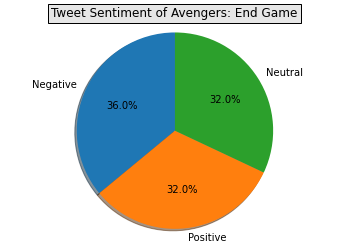

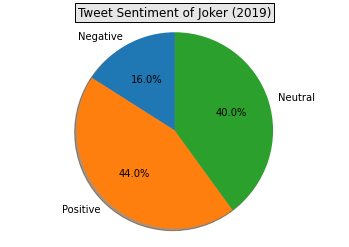

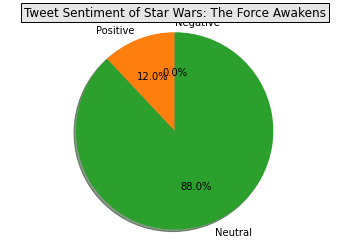

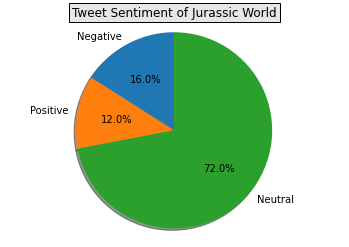

In [14]:
sentiment(endgame, "Avengers: End Game")
sentiment(joker, "Joker (2019)")
sentiment(starwars, "Star Wars: The Force Awakens")
sentiment(jurassicwrld, "Jurassic World")

In [0]:
testclean=list()
for x in movietweets['tweets']:
    testclean.append(x)

In [18]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_vectorizer.fit(testclean)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [0]:
#print(cnt_vectorizer.vocabulary_)

In [20]:
vec1 = cnt_vectorizer.transform(testclean).toarray()
print(vec1.shape)

(3691, 7771)


In [21]:
kmm = KMeans(n_clusters=2)
kmm.fit(vec1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmm.labels_
#print(labels)

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

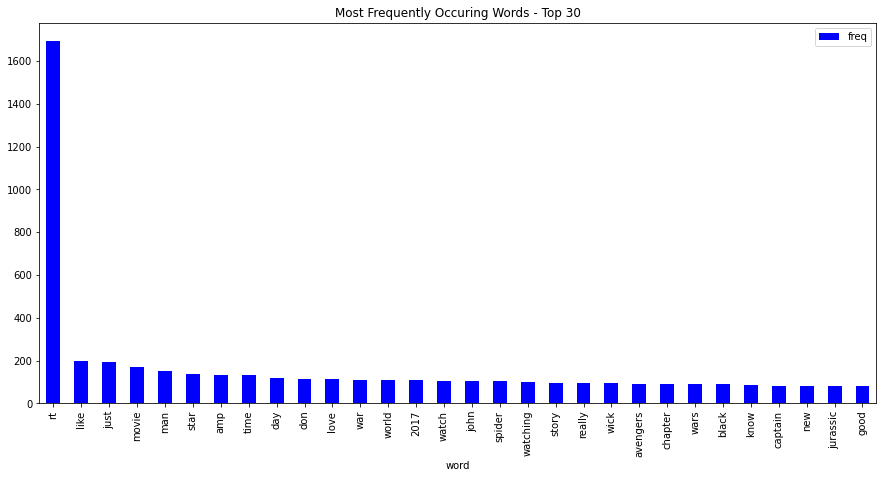

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# making an object for the count vectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(movietweets.tweets)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [0]:
#for x in labels:
 #   print(x)

In [0]:
movietweets['label']=labels

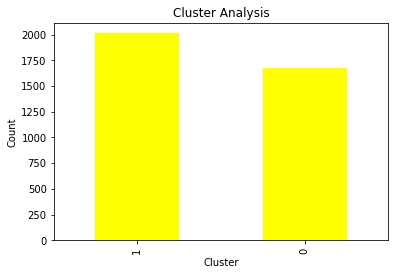

In [28]:
movietweets['label'].value_counts().plot.bar(color = 'yellow', figsize = (6, 4))
plt.title('Cluster Analysis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [0]:
from wordcloud import WordCloud, STOPWORDS
s = ['https','http','co','com','this','to','it','they','for','with','how','and','of','the','in','an','is']

Text(0.5, 1.0, ' Vocabulary from Tweets')

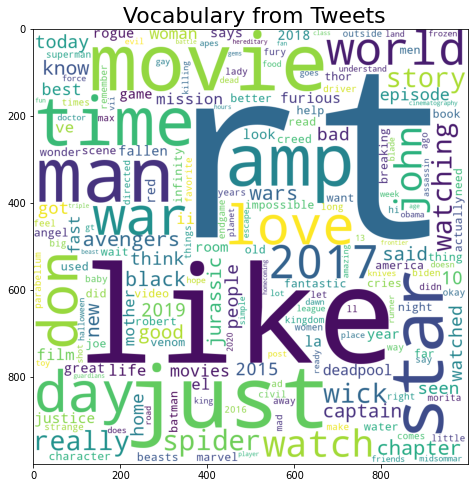

In [30]:
wordcloud = WordCloud(background_color = 'white', stopwords = s, width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title(" Vocabulary from Tweets", fontsize = 22)